In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [2]:
path_land = Path('UCMerced_LandUse')
land = get_image_files(path_land)
land

(#2100) [Path('UCMerced_LandUse/agricultural/agricultural00.tif'),Path('UCMerced_LandUse/agricultural/agricultural01.tif'),Path('UCMerced_LandUse/agricultural/agricultural02.tif'),Path('UCMerced_LandUse/agricultural/agricultural03.tif'),Path('UCMerced_LandUse/agricultural/agricultural04.tif'),Path('UCMerced_LandUse/agricultural/agricultural05.tif'),Path('UCMerced_LandUse/agricultural/agricultural06.tif'),Path('UCMerced_LandUse/agricultural/agricultural07.tif'),Path('UCMerced_LandUse/agricultural/agricultural08.tif'),Path('UCMerced_LandUse/agricultural/agricultural09.tif')...]

In [3]:
failed = verify_images(land)
failed

(#0) []

In [4]:
lands = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

In [5]:
lands_dls = lands.dataloaders(path_land)

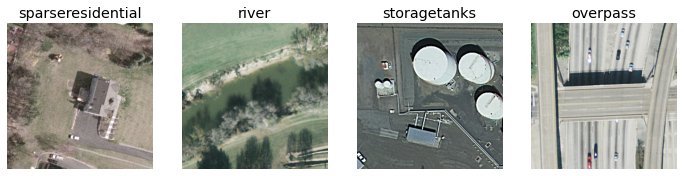

In [6]:
lands_dls.valid.show_batch(max_n=4, nrows=1)

In [7]:
# El modelo de las imagenes del terreno
#lands = lands.new(
#    item_tfms=RandomResizedCrop(224, min_scale=0.5),
#    batch_tfms=aug_transforms())
#lands_dls = lands.dataloaders(path_land)
lands = lands.new(
    item_tfms=Resize(256),
    batch_tfms=aug_transforms())
lands_dls = lands.dataloaders(path_land)

In [8]:
learn_lands = cnn_learner(lands_dls, vgg16_bn, metrics=error_rate)
learn_lands.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.777147,0.874688,0.278571,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.748429,0.336220,0.092857,00:48
1,0.489178,0.181558,0.057143,00:48
2,0.316400,0.121414,0.042857,00:48
3,0.227098,0.118322,0.035714,00:48


In [9]:
interp_lands = ClassificationInterpretation.from_learner(learn_lands)
#interp_lands.plot_confusion_matrix()
interp_lands.print_classification_report()

                   precision    recall  f1-score   support

     agricultural       1.00      1.00      1.00        15
         airplane       1.00      1.00      1.00        22
  baseballdiamond       1.00      1.00      1.00        26
            beach       1.00      1.00      1.00        17
        buildings       1.00      0.82      0.90        11
        chaparral       1.00      1.00      1.00        23
 denseresidential       0.90      0.86      0.88        22
           forest       1.00      1.00      1.00        15
          freeway       1.00      1.00      1.00        18
       golfcourse       1.00      1.00      1.00        21
           harbor       1.00      1.00      1.00        16
     intersection       0.94      0.89      0.91        18
mediumresidential       0.73      0.95      0.83        20
   mobilehomepark       0.92      0.88      0.90        25
         overpass       0.95      0.95      0.95        20
       parkinglot       1.00      1.00      1.00       

In [10]:
cleaner_lands = ImageClassifierCleaner(learn_lands)
cleaner_lands

In [11]:
p = learn_lands.predict('predictions/08.PNG')

In [12]:
p[0]

'airplane'

In [13]:
p[2]

tensor([3.1493e-03, 6.1014e-01, 1.0345e-02, 3.5808e-01, 3.4371e-03, 3.1425e-04, 1.1798e-05, 1.7787e-03, 5.2877e-06, 5.2472e-04, 6.1035e-04, 2.2419e-06, 1.2220e-05, 4.4465e-04, 1.7436e-04, 6.3301e-05,
        1.2547e-04, 1.4551e-05, 2.9336e-04, 1.0443e-02, 2.5779e-05])

In [14]:
p[1]

tensor(1)

In [15]:
for x in p[2]:
    print(x * 100)

tensor(0.3149)
tensor(61.0140)
tensor(1.0345)
tensor(35.8085)
tensor(0.3437)
tensor(0.0314)
tensor(0.0012)
tensor(0.1779)
tensor(0.0005)
tensor(0.0525)
tensor(0.0610)
tensor(0.0002)
tensor(0.0012)
tensor(0.0445)
tensor(0.0174)
tensor(0.0063)
tensor(0.0125)
tensor(0.0015)
tensor(0.0293)
tensor(1.0443)
tensor(0.0026)


In [16]:
[x * 100 for x in p[2] if x * 100 > 51]

[tensor(61.0140)]

In [17]:
learn_lands.export()

In [19]:
learn_inf = load_learner(path/'export.pkl')

In [21]:
learn_inf.predict('predictions/08.PNG')[0]

'airplane'

In [23]:
learn_inf.dls.vocab

(#21) ['agricultural','airplane','baseballdiamond','beach','buildings','chaparral','denseresidential','forest','freeway','golfcourse'...]

In [24]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [76]:
btn_upload = SimpleNamespace(data = ['predictions/04.PNG'])

In [77]:
img = PILImage.create(btn_upload.data[-1])

In [63]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(256,256))
out_pl

Output()

In [64]:
pred,pred_idx,probs = learn_inf.predict(img)

In [69]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx] * 100:.02f}%'
lbl_pred

Label(value='Prediction: river; Probability: 94.00%')

In [70]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [71]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(256,256))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx] * 100:.02f}%'

btn_run.on_click(on_click_classify)

In [82]:
btn_upload = widgets.FileUpload()

In [83]:
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])